In [1]:
import numpy as np
import os
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus

#### Load and process the data

In [2]:
df=pd.read_csv('spyPortfolio.csv')

In [3]:
df.head()

,SPLS.A,MTB.A,UNM.A,VLO.A,AMZN.A,ADBE.A,CSX.A,PG.A,CMA.A,PEP.A,...,TMK.A,MU.A,AABA.A,MON.A,AKAM.A,HSY.A,BAC.A,WDC.A,EL.A,SPY.A
0,13.358053,106.356094,31.958076,44.677620,397.970001,59.290001,26.069447,71.506683,44.108505,74.317741,...,51.619999,21.660000,39.590000,108.231735,46.529999,88.486427,15.449621,75.437431,70.423569,170.514297
1,13.529419,106.494751,31.967392,44.211758,396.440002,59.160000,26.235554,71.426781,44.325039,74.444466,...,51.720001,20.969999,40.119999,108.268967,46.450001,88.375725,15.747098,75.984871,70.366249,170.486343
2,13.135275,106.161972,31.920845,44.641788,393.630005,58.119999,26.041761,71.595474,44.249718,74.480675,...,51.533333,20.670000,39.930000,107.645485,46.110001,88.126678,15.986997,75.629036,70.777077,169.992279
3,13.537988,106.744331,32.134956,46.066227,398.029999,58.970001,26.161730,72.287987,44.532166,75.566925,...,51.959999,21.730000,40.919998,105.374969,47.009998,89.473389,15.833461,78.147255,70.595535,171.036346
4,13.375189,107.040138,32.339752,46.460415,401.920013,58.900002,26.050989,71.240334,44.833435,75.349686,...,52.353333,23.870001,41.020000,107.635468,46.680000,90.155968,15.910229,78.840691,69.821655,171.073608


Calculate the log return

In [6]:
logdf=np.log(df/df.shift(1)).dropna()

Make log returns of all stock prices lagged one day relative to the daily log returns of SPY

In [12]:
features=logdf.shift(1).dropna().iloc[:,:-1]
target=logdf.iloc[1:,-1]

#### Apply PCA

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9)
newfeat=pca.fit_transform(features)

#### Grow regression tree from the PCA components

In [21]:
clf = DecisionTreeRegressor()
clf.fit(newfeat, target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [24]:
from IPython.display import Image
dot_data=tree.export_graphviz(clf, out_file=None,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


#### Prune the tree

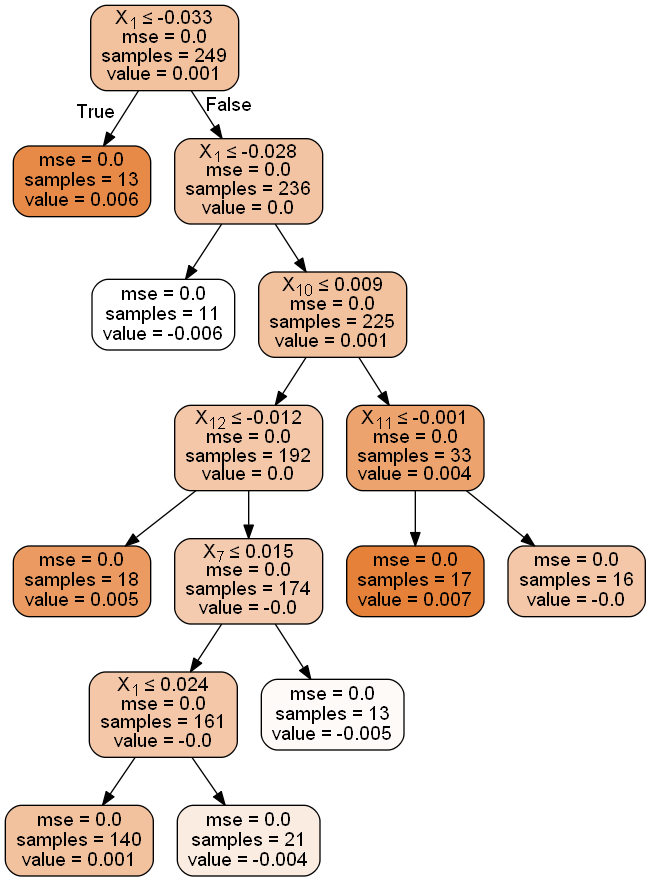

In [25]:
clf=DecisionTreeRegressor(max_depth=6,min_samples_leaf=10)
clf.fit(newfeat, target)
dot_data=tree.export_graphviz(clf, out_file=None,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

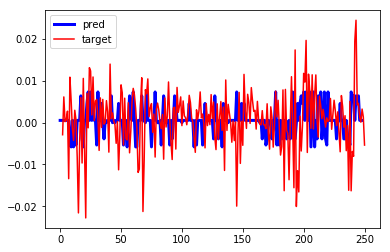

In [35]:
pred=clf.predict(newfeat)
plt.plot(pred,'b',linewidth=3)
plt.plot(target,'r')
plt.legend(['pred','target'])
plt.show()